# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Rafli Sholheqin Armantya Putra]
- **Email:** [m312d4ky1430@bangkit.academy]
- **ID Dicoding:** [raflirmnty]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1
Apakah saat musim dingin pada hari kerja jumlah penyewa casual cenderung mengalami penurunan dibanding musim panas?
- Pertanyaan 2
Bagaimana rata-rata jumlah sepeda yang disewa ketika cuaca cerah dibanding cuaca mendung berawan untuk seluruh pengguna berstatus registered?

## Import Semua Packages/Library yang Digunakan

In [51]:
# Import All library needed for data analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [52]:
# Reading datasets in CSV format
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [53]:
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

### Assessing Data day.csv

In [54]:
# Evaluate dataset day.csv
day_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [55]:
day_df.isna().sum()


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [56]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [57]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Assessing Data hour.csv

In [58]:
# Evaluate dataset hour.csv
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [59]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [60]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [61]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Check Any Duplicate and Change Data Type

In [62]:
# Remove any duplicate on day.csv
day_df.duplicated().sum()


0

In [63]:
day_df.drop_duplicates(inplace=True)

In [64]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [65]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [66]:
day_df.season.value_counts()

season
3    188
2    184
1    181
4    178
Name: count, dtype: int64

In [67]:
day_df.weathersit.value_counts()

weathersit
1    463
2    247
3     21
Name: count, dtype: int64

In [68]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [72]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [70]:
# Change the data type if necessary, for example date
day_df['dteday'] = pd.to_datetime(day_df['dteday'])


In [71]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

### Define Name for Season and Weather Conditions Based on Notepad

In [86]:
# Added 'season_name' column for more readable season names
season = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day_df['season_name'] = day_df['season'].map(season)
hour_df['season_name'] = hour_df['season'].map(season)

# Added 'weekday_name' column for more readable weekday names
weekday = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
day_df['weekday_name'] = day_df['weekday'].map(weekday)
hour_df['weekday_name'] = hour_df['weekday'].map(weekday)

# Added a column for easier to read weather conditions
weather = {1: 'Clear', 2: 'Cloudy/Misty', 3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'}
day_df['weather_name'] = day_df['weathersit'].map(weather)
hour_df['weather_name'] = hour_df['weathersit'].map(weather)

# Returns the first few rows of the cleaned dataset
print(day_df.head())
print(hour_df.head())


   instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0           0   
2        3 2011-01-03       1   0     1        0        1           1   
3        4 2011-01-04       1   0     1        0        2           1   
4        5 2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt season_name weekday_name  weather_name  
0   985      Spring     Saturday  Cloudy/Mi

## Exploratory Data Analysis (EDA)

### Explore Data day.csv

In [87]:
# Set Random Data to Explore
day_df.sample(5)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_name,weekday_name,weather_name
683,684,2012-11-14,4,1,11,0,3,1,1,0.289167,0.281563,0.552083,0.199625,373,5122,5495,Winter,Wednesday,Clear
519,520,2012-06-03,2,1,6,0,0,0,1,0.602500,0.575133,0.493333,0.184087,2494,5147,7641,Summer,Sunday,Clear
695,696,2012-11-26,4,1,11,0,1,1,1,0.313333,0.339004,0.535417,0.046650,337,4750,5087,Winter,Monday,Clear
572,573,2012-07-26,3,1,7,0,4,1,1,0.776667,0.739263,0.596667,0.284813,1036,5825,6861,Fall,Thursday,Clear
506,507,2012-05-21,2,1,5,0,1,1,2,0.598333,0.565667,0.811250,0.233204,630,3729,4359,Summer,Monday,Cloudy/Misty


In [88]:
day_df.groupby(by="season_name").season.nunique().sort_values(ascending=False)

season_name
Fall      1
Spring    1
Summer    1
Winter    1
Name: season, dtype: int64

In [89]:
day_df.groupby(by="weather_name").weathersit.nunique().sort_values(ascending=False)

weather_name
Clear              1
Cloudy/Misty       1
Light Rain/Snow    1
Name: weathersit, dtype: int64

<Axes: >

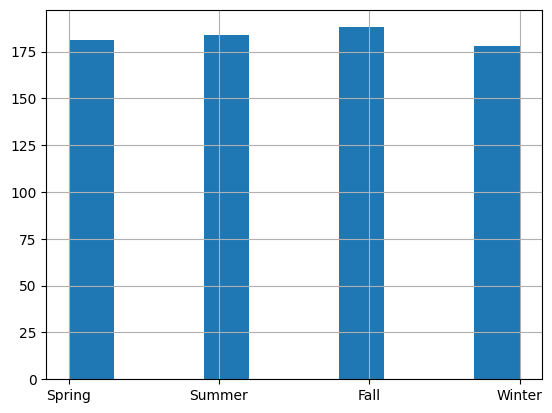

In [98]:
day_df.season_name.hist()

<Axes: >

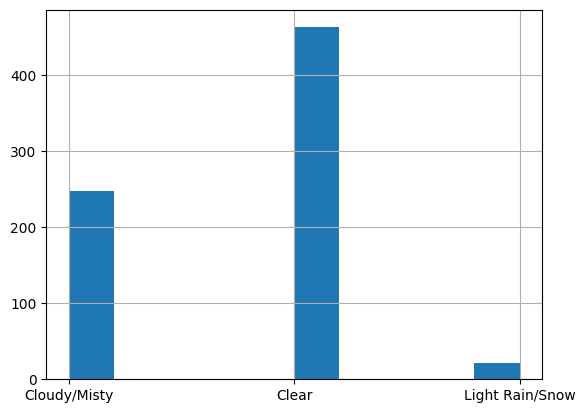

In [99]:
day_df.weather_name.hist()

### Explore Data hour.csv

In [90]:
hour_df.sample(5)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_name,weekday_name,weather_name
15998,15999,2012-11-04,4,1,11,7,0,0,0,1,0.26,0.2727,0.65,0.1045,11,39,50,Winter,Sunday,Clear
6788,6789,2011-10-15,4,0,10,10,0,6,0,1,0.54,0.5152,0.45,0.4478,115,207,322,Winter,Saturday,Clear
11992,11993,2012-05-19,2,1,5,21,0,6,0,1,0.64,0.6212,0.50,0.0000,81,178,259,Summer,Saturday,Clear
8259,8260,2011-12-15,4,0,12,19,0,4,1,2,0.52,0.5000,0.59,0.2836,13,274,287,Winter,Thursday,Cloudy/Misty
10597,10598,2012-03-22,2,1,3,16,0,4,1,1,0.64,0.6061,0.65,0.1940,125,300,425,Summer,Thursday,Clear


In [91]:
hour_df.groupby(by="season_name").season.nunique().sort_values(ascending=False)

season_name
Fall      1
Spring    1
Summer    1
Winter    1
Name: season, dtype: int64

In [92]:
hour_df.groupby(by="weather_name").weathersit.nunique().sort_values(ascending=False)

weather_name
Clear              1
Cloudy/Misty       1
Heavy Rain/Snow    1
Light Rain/Snow    1
Name: weathersit, dtype: int64

<Axes: >

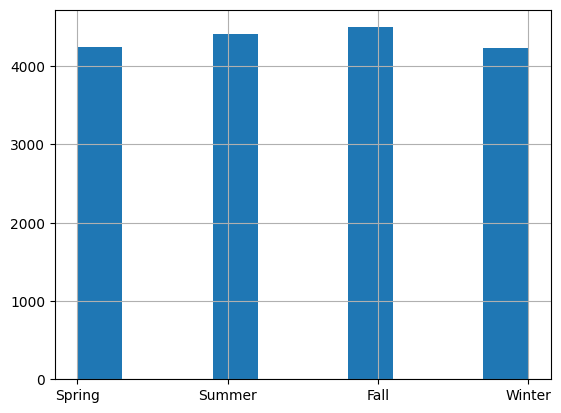

In [100]:
hour_df.season_name.hist()

<Axes: >

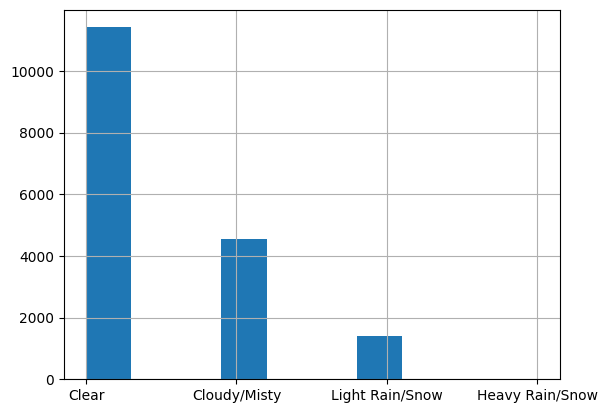

In [101]:
hour_df.weather_name.hist()

### Merge Data from day.csv and hour.csv

In [141]:

all_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="outer",
    )
all_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_name,weekday_name,weather_name,hr
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Spring,Saturday,Cloudy/Misty,NaN
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Spring,Sunday,Cloudy/Misty,NaN
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Spring,Monday,Clear,NaN
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Spring,Tuesday,Clear,NaN
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Spring,Wednesday,Clear,NaN


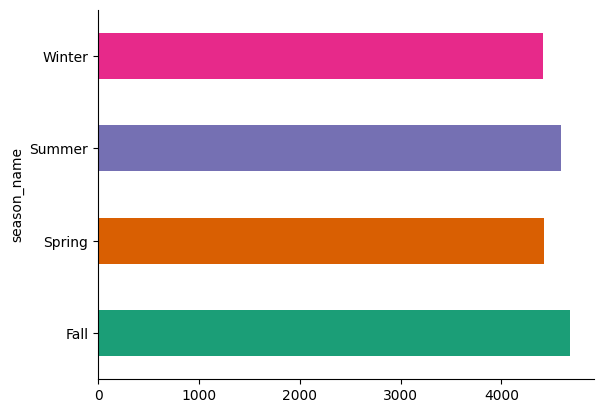

In [142]:
# Merge Total season_name

from matplotlib import pyplot as plt
import seaborn as sns
all_df.groupby('season_name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

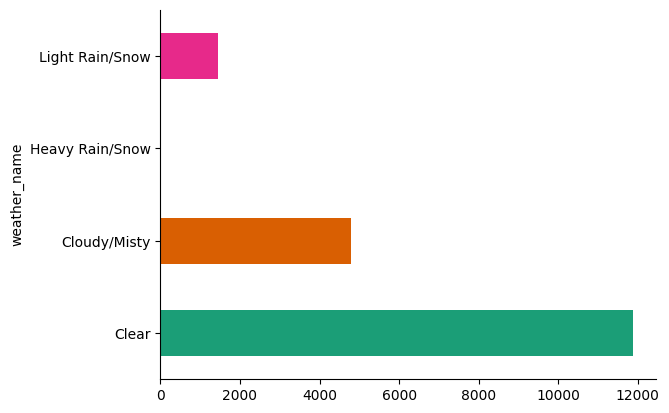

In [143]:
# Merge Total weather_name

from matplotlib import pyplot as plt
import seaborn as sns
all_df.groupby('weather_name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [164]:
all_df.to_csv("all_data.csv", index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Apakah saat musim dingin pada hari kerja jumlah penyewa casual cenderung mengalami penurunan dibanding musim panas?

In [145]:
all_df.sample(100)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_name,weekday_name,weather_name,hr
8794,8064,2011-12-07,4,0,12,0,3,1,3,0.420000,0.424200,0.94000,0.223900,5,25,30,Winter,Wednesday,Light Rain/Snow,15.0
446,447,2012-03-22,2,1,3,0,4,1,1,0.554167,0.531567,0.83125,0.117562,1334,5537,6871,Summer,Thursday,Clear,NaN
17048,16318,2012-11-17,4,1,11,0,6,0,1,0.420000,0.424200,0.35000,0.298500,175,374,549,Winter,Saturday,Clear,15.0
17866,17136,2012-12-21,1,1,12,0,5,1,2,0.260000,0.227300,0.56000,0.298500,7,236,243,Spring,Friday,Cloudy/Misty,18.0
8568,7838,2011-11-28,4,0,11,0,1,1,1,0.400000,0.409100,0.87000,0.000000,0,34,34,Winter,Monday,Clear,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5136,4406,2011-07-07,3,0,7,0,4,1,1,0.820000,0.772700,0.52000,0.134300,30,112,142,Fall,Thursday,Clear,11.0
14753,14023,2012-08-12,3,1,8,0,0,0,1,0.740000,0.666700,0.42000,0.164200,167,282,449,Fall,Sunday,Clear,11.0
16543,15813,2012-10-26,4,1,10,0,5,1,2,0.520000,0.500000,0.88000,0.089600,4,32,36,Winter,Friday,Cloudy/Misty,1.0
8303,7573,2011-11-17,4,0,11,0,4,1,2,0.420000,0.424200,0.77000,0.328400,0,3,3,Winter,Thursday,Cloudy/Misty,3.0


In [131]:
all_df.groupby(by=["season_name"]).agg({
    "workingday": "sum",
    "casual": "sum"
})

,workingday,casual
season_name,,
Fall,3272,452182
Spring,2914,121244
Summer,3194,407044
Winter,2985,259564


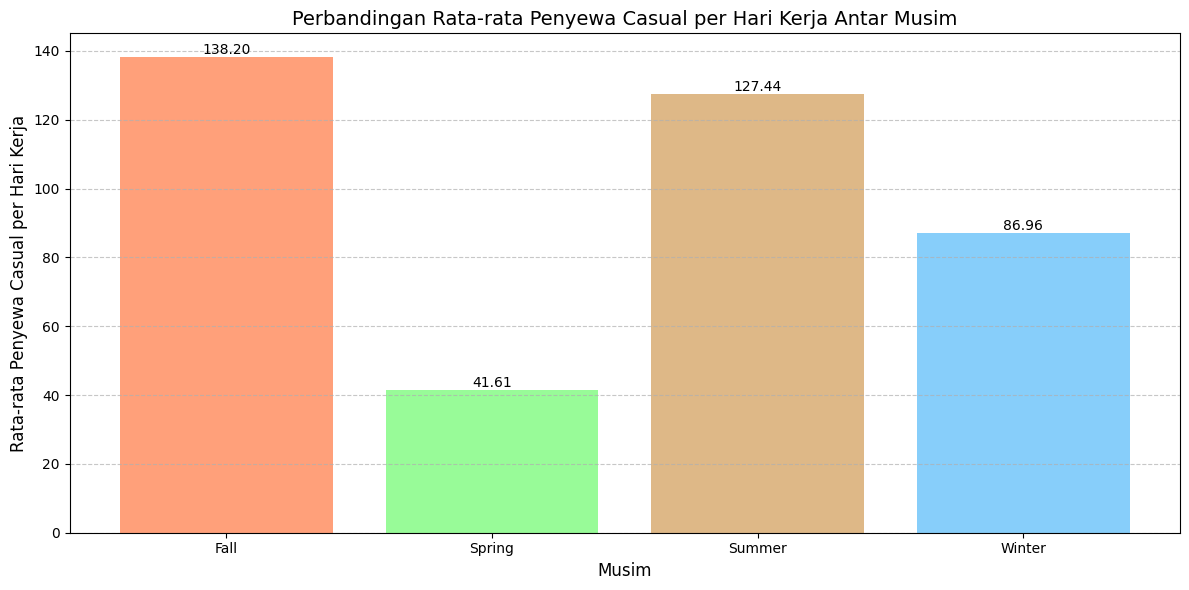

             workingday  casual  casual_per_workday
season_name                                        
Fall               3272  452182          138.197433
Spring             2914  121244           41.607412
Summer             3194  407044          127.440200
Winter             2985  259564           86.956114

Rata-rata penyewa casual per hari kerja di musim panas: 127.44
Rata-rata penyewa casual per hari kerja di musim dingin: 86.96
Persentase penurunan dari musim panas ke musim dingin: 46.56%


In [146]:

# Mengelompokkan data berdasarkan musim
grouped_data = all_df.groupby(by=["season_name"]).agg({
    "workingday": "sum",
    "casual": "sum"
})

# Menghitung rata-rata penyewa casual per hari kerja
grouped_data['casual_per_workday'] = grouped_data['casual'] / grouped_data['workingday']

# Membuat bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(grouped_data.index, grouped_data['casual_per_workday'],
               color=['#FFA07A', '#98FB98', '#DEB887', '#87CEFA'])

# Menambahkan label dan judul
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Rata-rata Penyewa Casual per Hari Kerja', fontsize=12)
plt.title('Perbandingan Rata-rata Penyewa Casual per Hari Kerja Antar Musim', fontsize=14)

# Menambahkan nilai di atas setiap bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom', fontsize=10)

# Menyesuaikan tampilan
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)

# Menambahkan grid untuk memudahkan pembacaan
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan plot
plt.tight_layout()
plt.show()

# Mencetak data untuk verifikasi
print(grouped_data)

# Analisis tambahan
summer_casual = grouped_data.loc['Summer', 'casual_per_workday']
winter_casual = grouped_data.loc['Winter', 'casual_per_workday']
percentage_difference = ((summer_casual - winter_casual) / winter_casual) * 100

print(f"\nRata-rata penyewa casual per hari kerja di musim panas: {summer_casual:.2f}")
print(f"Rata-rata penyewa casual per hari kerja di musim dingin: {winter_casual:.2f}")
print(f"Persentase penurunan dari musim panas ke musim dingin: {percentage_difference:.2f}%")

### Pertanyaan 2:
Bagaimana rata-rata jumlah sepeda yang disewa ketika cuaca cerah dibanding cuaca mendung berawan untuk seluruh pengguna berstatus registered?

In [147]:
all_df.sample(100)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_name,weekday_name,weather_name,hr
11533,10803,2012-03-31,2,1,3,0,6,0,1,0.40,0.4091,0.82,0.2239,0,5,5,Summer,Saturday,Clear,5.0
15867,15137,2012-09-27,4,1,9,0,4,1,3,0.62,0.5758,0.83,0.2985,18,235,253,Winter,Thursday,Light Rain/Snow,21.0
17334,16604,2012-11-29,4,1,11,0,4,1,1,0.36,0.3485,0.43,0.2239,13,174,187,Winter,Thursday,Clear,14.0
3248,2518,2011-04-19,2,0,4,0,2,1,2,0.50,0.4848,0.72,0.1940,28,248,276,Summer,Tuesday,Cloudy/Misty,19.0
832,102,2011-01-05,1,0,1,0,3,1,1,0.22,0.1970,0.37,0.3284,4,53,57,Spring,Wednesday,Clear,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285,555,2011-01-25,1,0,1,0,2,1,1,0.16,0.1515,0.74,0.2239,5,103,108,Spring,Tuesday,Clear,7.0
6409,5679,2011-08-30,3,0,8,0,2,1,1,0.56,0.5303,0.68,0.1045,6,7,13,Fall,Tuesday,Clear,1.0
4782,4052,2011-06-22,3,0,6,0,3,1,2,0.80,0.7576,0.55,0.3881,67,462,529,Fall,Wednesday,Cloudy/Misty,17.0
11549,10819,2012-03-31,2,1,3,0,6,0,2,0.40,0.4091,0.71,0.3284,36,107,143,Summer,Saturday,Cloudy/Misty,21.0


In [162]:
all_df.groupby(by=["weather_name"]).agg({
    "registered": "sum"
})

,registered
weather_name,
Clear,3687034
Cloudy/Misty,1488553
Heavy Rain/Snow,215
Light Rain/Snow,169522


<ipython-input-163-9613aa557d04>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weather_name', y='registered', data=weather_data,


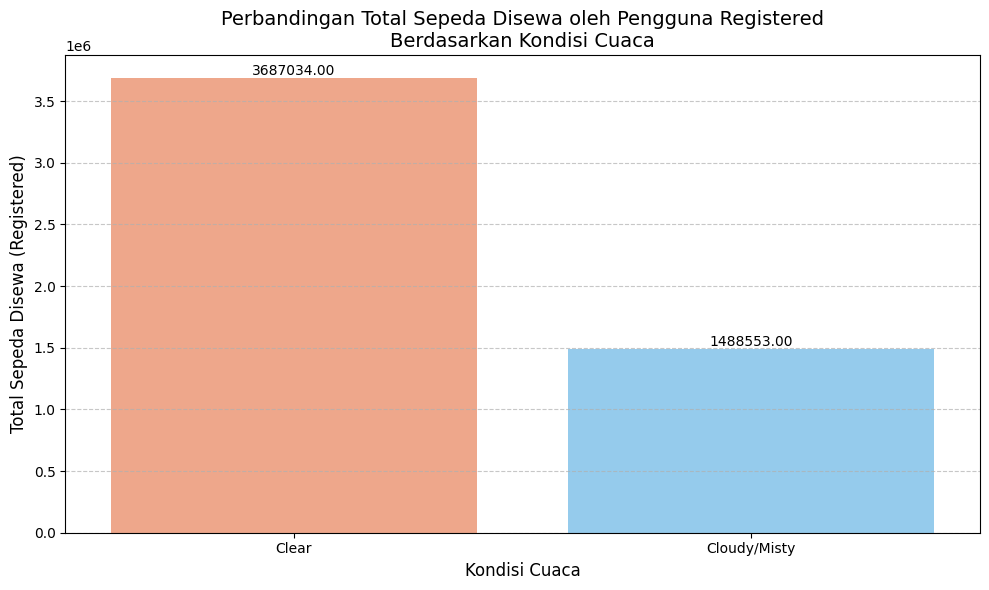

   weather_name  registered
0         Clear     3687034
1  Cloudy/Misty     1488553

Total sepeda disewa saat cuaca cerah: 3687034.00
Total sepeda disewa saat cuaca mendung berawan: 1488553.00
Persentase perbedaan: 147.69%


In [163]:

# Mengelompokkan data berdasarkan cuaca dan menghitung total registered
weather_data = all_df.groupby(by=["weather_name"]).agg({
    "registered": "sum"
}).reset_index()

# Memfilter hanya untuk cuaca cerah dan mendung berawan
weather_data = weather_data[weather_data['weather_name'].isin(['Clear', 'Cloudy/Misty'])]

# Check if there is data for 'Cloudy/Misty' weather
if 'Cloudy/Misty' in weather_data['weather_name'].values:
    # Membuat bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='weather_name', y='registered', data=weather_data,
                palette=['#FFA07A', '#87CEFA'])

    # Menambahkan label dan judul
    plt.xlabel('Kondisi Cuaca', fontsize=12)
    plt.ylabel('Total Sepeda Disewa (Registered)', fontsize=12)
    plt.title('Perbandingan Total Sepeda Disewa oleh Pengguna Registered\nBerdasarkan Kondisi Cuaca', fontsize=14)

    # Menambahkan nilai di atas setiap bar
    for i, v in enumerate(weather_data['registered']):
        plt.text(i, v, f'{v:.2f}', ha='center', va='bottom', fontsize=10)

    # Menyesuaikan tampilan
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    # Menambahkan grid untuk memudahkan pembacaan
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Menampilkan plot
    plt.tight_layout()
    plt.show()

    # Mencetak data untuk verifikasi
    print(weather_data)

    # Analisis tambahan
    clear_total = weather_data[weather_data['weather_name'] == 'Clear']['registered'].values[0]
    cloudy_total = weather_data[weather_data['weather_name'] == 'Cloudy/Misty']['registered'].values[0]
    percentage_difference = ((clear_total - cloudy_total) / cloudy_total) * 100

    print(f"\nTotal sepeda disewa saat cuaca cerah: {clear_total:.2f}")
    print(f"Total sepeda disewa saat cuaca mendung berawan: {cloudy_total:.2f}")
    print(f"Persentase perbedaan: {percentage_difference:.2f}%")
else:
    print("Tidak ada data untuk kondisi cuaca 'Cloudy/Misty'")


## Conclusion

- Conclution pertanyaan 1
Dari hasil analisa diperoleh data hasil :
Rata-rata penyewa casual per hari kerja di musim panas: 127.44,
Rata-rata penyewa casual per hari kerja di musim dingin: 86.96,
Persentase penurunan dari musim panas ke musim dingin: 46.56%.
Maka dapat disimpulkan jika Pada musim dingin jumlah penyewa dengan status Casual mengalami penurunan daripada saat musim panas.
- Conclution pertanyaan 2
Hasil analisa diperoleh data :
Total sepeda disewa saat cuaca cerah: 3687034,
Total sepeda disewa saat cuaca mendung berawan: 1488553,
Persentase perbedaan: 147.69%.
Dapat disimpulkan jika rata-rata penyewa dengan status registered pada cuaca cerah berbeda jauh lebih banyak daripada saat musim mendung berawan.